In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
print(
    f"numpy=={np.__version__}",
    f"tensorflow=={tf.__version__}",
    sep="\n"
)

numpy==1.18.1
tensorflow==2.2.0-dev20200219


In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
@tf.function
def f(x):
    loss = (x - 5) ** 2
    return loss

In [5]:
x = tf.constant(1.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    loss = f(x)
    dloss_dx = tape.gradient(loss, x)
    print(dloss_dx)
del tape # Drop the referance

tf.Tensor(-8.0, shape=(), dtype=float32)


In [6]:
def train(loss_func, lr=0.01):
    x = tf.Variable(1.0)
    with tf.GradientTape(persistent=True) as tape:
        for _ in range(100):
            loss = loss_func(x)
            dloss_dx = tape.gradient(loss, x)
            x = x - lr * dloss_dx
    del tape
    return x

In [7]:
x_hat = train(f)
print(x_hat)

tf.Tensor(4.4695225, shape=(), dtype=float32)


In [8]:
x_hat = train(f, lr=0.1)
print(x_hat)

tf.Tensor(4.999999, shape=(), dtype=float32)


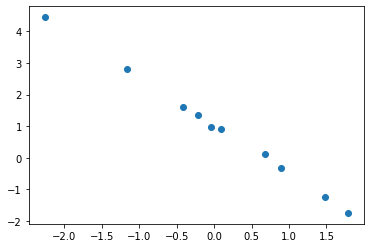

In [12]:
X = tf.random.normal((10, 1))
w_true = tf.random.normal((1, 1))
b_true = tf.constant(1.0)
y_true = X @ w_true + b_true + 0.05 * tf.random.normal((10, 1))
plt.scatter(X, y_true)

In [21]:
@tf.function
def mean_squared_error(y_true, y_pred):
    loss = tf.reduce_mean((y_true - y_pred) ** 2)
    return loss

@tf.function
def predict(X, w, b):
    preds = X @ w + b
    return preds

def train_linear_regressor(lr=0.01):
    w = tf.random.normal((1, 1))
    b = tf.constant(0.0)

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(w)
        tape.watch(b)
        for _ in range(100):
            y_pred = predict(X, w, b)
            loss = mean_squared_error(y_true, y_pred)
            loss_grad_w, loss_grad_b = tape.gradient(loss, [w, b])
            w = w - lr * loss_grad_w
            b = b - lr * loss_grad_b
    return w, b

In [22]:
w_opt, b_opt = train_linear_regressor()

In [23]:
preds = predict(X, w_opt, b_opt)
print(f"loss: {mean_squared_error(y_true, preds)}")
print(f"actual_w: {w}")
print(f"inferred w: {w_opt}")
print(f"actual b: {b}")
print(f"inferred b: {b_opt}")

loss: 0.037842437624931335
actual_w: [[-2.0935113]]
inferred w: [[-1.425751]]
actual b: 0.0
inferred b: 0.8589568138122559


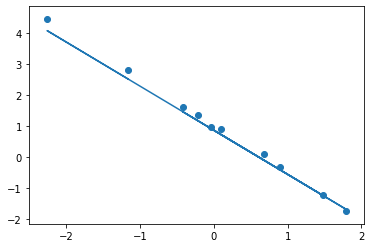

In [24]:
plt.plot(X, predict(X, w_opt, b_opt))
plt.scatter(X, y_true)

In [136]:
data = np.random.randn(1000, 2)
dataset = tf.data.Dataset.from_tensor_slices(data)
batch_size = 10
batch = dataset.batch(batch_size).__iter__()
batch

In [30]:
batch.get_next()

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[ 0.27737694,  1.3606586 ],
       [-1.3088204 , -3.01951216],
       [ 0.18384954,  1.80051118],
       [ 1.23894635,  0.20965942],
       [-0.49163619,  0.8071226 ],
       [-0.9735462 ,  0.47635777],
       [ 0.50547016,  1.06020991],
       [ 2.75966004,  0.39241597],
       [-0.50896363, -0.02557431],
       [-1.7690759 , -0.69471313]])>

In [163]:
def heavy_computation(tensor):
    a = tf.exp(0.5 * (tensor - 1.0) ** 2 / 2 * tensor % 10)

In [175]:
# A dummy dataset with 1000 samples and 2 features.
data = np.random.randn(1000, 2)

batched_data = data.reshape(10, -1, 2)

# Sum all the elements in the tensor in parallel
result = tf.vectorized_map(heavy_computation, batched_data)

In [176]:
%timeit tf.vectorized_map(heavy_computation, batched_data)

564 ms ± 9.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [177]:
%timeit for i in range(0, 1000, 10): heavy_computation(data[i:i+10, :])

245 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
